# Worksheet 24

Name:  Naima Abrar
UID: U04989541

### Topics

- Tuning Neural Networks

## Tuning Neural Networks

Nothing to do in this worksheet except follow along in lecture / use this code to better understand Neural Networks.

in the second cell, I attempt to improve the model by adding more neurons in the hidden layer, increading the number of hidden layers and

The decision boundary in the second case does a better job of classifying points since the blue and green points get divided better. It is capable of creating more complex, nuanced decision boundaries due to more neurons and layers. I also later added Adam because it adjusts learning rates automatically, and performs well with large datasets and in high-dimensional parameter spaces

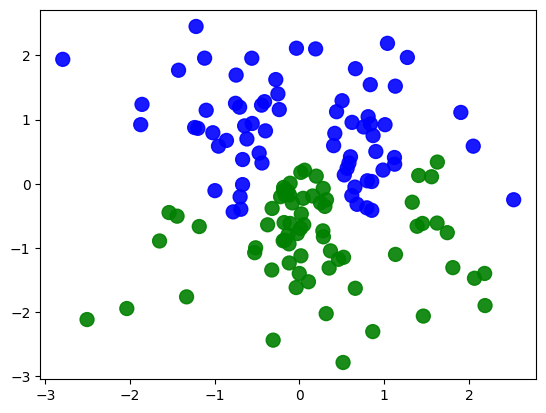

Epoch 1/200
3/3 [==============================] - 1s 6ms/step - loss: 0.8366
Epoch 2/200
3/3 [==============================] - 0s 7ms/step - loss: 0.8307
Epoch 3/200
3/3 [==============================] - 0s 4ms/step - loss: 0.8266
Epoch 4/200
3/3 [==============================] - 0s 3ms/step - loss: 0.8230
Epoch 5/200
3/3 [==============================] - 0s 3ms/step - loss: 0.8198
Epoch 6/200
3/3 [==============================] - 0s 3ms/step - loss: 0.8169
Epoch 7/200
3/3 [==============================] - 0s 3ms/step - loss: 0.8140
Epoch 8/200
3/3 [==============================] - 0s 5ms/step - loss: 0.8111
Epoch 9/200
3/3 [==============================] - 0s 4ms/step - loss: 0.8085
Epoch 10/200
3/3 [==============================] - 0s 4ms/step - loss: 0.8060
Epoch 11/200
3/3 [==============================] - 0s 4ms/step - loss: 0.8036
Epoch 12/200
3/3 [==============================] - 0s 5ms/step - loss: 0.8012
Epoch 13/200
3/3 [==============================] - 0s 4ms/st

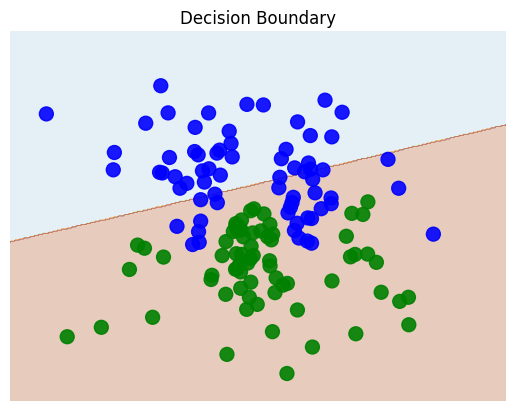

In [ ]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from tensorflow import keras, math, random, stack
from tensorflow.keras import layers, initializers
from tensorflow.keras.activations import relu

# Set random seed for reproducibility
np.random.seed(1)
random.set_seed(1)

# Data generation - don't modify
centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=200, centers=centers, cluster_std=1,
                                random_state=1)

colors = np.array([x for x in 'bgrcmyk'])

# CURVE
def generate_curve_data(t):
    # create some space between the classes
    X = np.array(list(filter(lambda x : m.cos(4*x[0]) - x[1] < -.5 or m.cos(4*x[0]) - x[1] > .5, t)))
    Y = np.array([1 if m.cos(4*x[0]) - x[1] >= 0 else 0 for x in X])
    return X, Y

# The model - modify this
model = keras.models.Sequential()
model.add(layers.Dense(3, input_dim=2, activation="sigmoid"))
model.add(layers.Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy")

X, Y = generate_curve_data(t)

# plot the data
plt.scatter(X[:,0],X[:,1],color=colors[Y].tolist(), s=100, alpha=.9)
plt.show()

history = model.fit(X, Y, batch_size=50, epochs=200)

# Plot the decision boundary

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]

fig, ax = plt.subplots()
Z = model.predict(meshData)
Z = np.array([0 if x < .5 else 1 for x in Z])
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=.3, cmap=plt.cm.Paired)
ax.axis('off')

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], color=colors[Y].tolist(), s=100, alpha=.9)
plt.title("Decision Boundary")
plt.show()

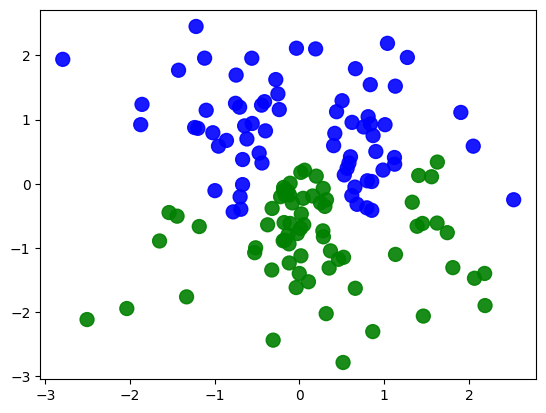

Epoch 1/200
3/3 [==============================] - 1s 5ms/step - loss: 0.6928
Epoch 2/200
3/3 [==============================] - 0s 3ms/step - loss: 0.6925
Epoch 3/200
3/3 [==============================] - 0s 4ms/step - loss: 0.6923
Epoch 4/200
3/3 [==============================] - 0s 3ms/step - loss: 0.6920
Epoch 5/200
3/3 [==============================] - 0s 5ms/step - loss: 0.6918
Epoch 6/200
3/3 [==============================] - 0s 5ms/step - loss: 0.6915
Epoch 7/200
3/3 [==============================] - 0s 3ms/step - loss: 0.6914
Epoch 8/200
3/3 [==============================] - 0s 3ms/step - loss: 0.6911
Epoch 9/200
3/3 [==============================] - 0s 3ms/step - loss: 0.6908
Epoch 10/200
3/3 [==============================] - 0s 5ms/step - loss: 0.6906
Epoch 11/200
3/3 [==============================] - 0s 3ms/step - loss: 0.6903
Epoch 12/200
3/3 [==============================] - 0s 3ms/step - loss: 0.6901
Epoch 13/200
3/3 [==============================] - 0s 4ms/st

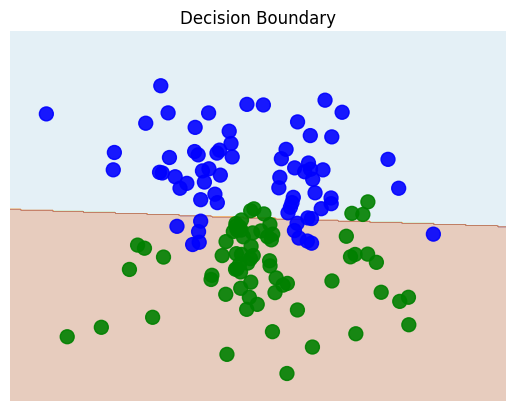

In [ ]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from tensorflow import keras, math, random, stack
from tensorflow.keras import layers, initializers
from tensorflow.keras.activations import relu
from tensorflow.keras.optimizers import Adam

# Set random seed for reproducibility
np.random.seed(1)
random.set_seed(1)

# Data generation - don't modify
centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=200, centers=centers, cluster_std=1,
                                random_state=1)

colors = np.array([x for x in 'bgrcmyk'])

# CURVE
def generate_curve_data(t):
    # create some space between the classes
    X = np.array(list(filter(lambda x : m.cos(4*x[0]) - x[1] < -.5 or m.cos(4*x[0]) - x[1] > .5, t)))
    Y = np.array([1 if m.cos(4*x[0]) - x[1] >= 0 else 0 for x in X])
    return X, Y

# The model - modify this
odel = keras.models.Sequential()
# Adding more neurons to the hidden layer and using ReLU activation
model.add(layers.Dense(10, input_dim=2, activation='relu'))
# Adding an additional hidden layer
model.add(layers.Dense(10, activation='relu'))
# Output layer remains the same
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model with an Adam optimizer and a learning rate of 0.001
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001))


X, Y = generate_curve_data(t)

# plot the data
plt.scatter(X[:,0],X[:,1],color=colors[Y].tolist(), s=100, alpha=.9)
plt.show()

history = model.fit(X, Y, batch_size=50, epochs=200)

# Plot the decision boundary

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]

fig, ax = plt.subplots()
Z = model.predict(meshData)
Z = np.array([0 if x < .5 else 1 for x in Z])
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=.3, cmap=plt.cm.Paired)
ax.axis('off')

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], color=colors[Y].tolist(), s=100, alpha=.9)
plt.title("Decision Boundary")
plt.show()